[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/data-augmentation/residual_ae_cnn.ipynb)


In [1]:
import torch
import cv2
import torchvision
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.optim import Adam
from matplotlib import pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# **Dataset**

In [3]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=64, shuffle=True, num_workers=0) # loading the downloaded dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4592415.97it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134487.03it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1268356.50it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3891039.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Modelling**

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = 

        self.decoder = 

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# **Training**

In [6]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [7]:
for epoch_idx in range(40): # Run training for 10 epochs

    losses = []

    for im, _ in tqdm(mnist_loader):

        im = im.float().to(device)
        optimizer.zero_grad()

        # passing to model
        out = model(im)

        # loss calculation
        loss = nn.MSELoss()(im, out)

        # housekeeping
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    print(f'''Finished epoch:{epoch_idx+1} | KL Loss : {np.mean(losses)} ''')

  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 938/938 [00:17<00:00, 53.31it/s]


Finished epoch:1 | KL Loss : 0.0808580923936705 


100%|██████████| 938/938 [00:15<00:00, 61.28it/s]


Finished epoch:2 | KL Loss : 0.018127962567611164 


100%|██████████| 938/938 [00:15<00:00, 61.91it/s]


Finished epoch:3 | KL Loss : 0.013234693753614482 


100%|██████████| 938/938 [00:15<00:00, 60.81it/s]


Finished epoch:4 | KL Loss : 0.011312370537035564 


100%|██████████| 938/938 [00:16<00:00, 55.27it/s]


Finished epoch:5 | KL Loss : 0.010407152768375396 


100%|██████████| 938/938 [00:15<00:00, 61.07it/s]


Finished epoch:6 | KL Loss : 0.009879784889396098 


100%|██████████| 938/938 [00:15<00:00, 61.94it/s]


Finished epoch:7 | KL Loss : 0.00954096797587616 


100%|██████████| 938/938 [00:15<00:00, 59.01it/s]


Finished epoch:8 | KL Loss : 0.009270482235399486 


100%|██████████| 938/938 [00:15<00:00, 61.15it/s]


Finished epoch:9 | KL Loss : 0.009098644196085616 


100%|██████████| 938/938 [00:15<00:00, 62.02it/s]


Finished epoch:10 | KL Loss : 0.008960895636962897 


100%|██████████| 938/938 [00:15<00:00, 61.41it/s]


Finished epoch:11 | KL Loss : 0.008859007654568629 


100%|██████████| 938/938 [00:15<00:00, 59.55it/s]


Finished epoch:12 | KL Loss : 0.008750409546639842 


100%|██████████| 938/938 [00:15<00:00, 61.65it/s]


Finished epoch:13 | KL Loss : 0.008683362525444962 


100%|██████████| 938/938 [00:15<00:00, 62.33it/s]


Finished epoch:14 | KL Loss : 0.008606599945165931 


100%|██████████| 938/938 [00:15<00:00, 61.72it/s]


Finished epoch:15 | KL Loss : 0.008553774583079954 


100%|██████████| 938/938 [00:15<00:00, 59.80it/s]


Finished epoch:16 | KL Loss : 0.008507850822180446 


100%|██████████| 938/938 [00:15<00:00, 62.42it/s]


Finished epoch:17 | KL Loss : 0.008459444708828288 


100%|██████████| 938/938 [00:15<00:00, 62.18it/s]


Finished epoch:18 | KL Loss : 0.008403135913370578 


100%|██████████| 938/938 [00:15<00:00, 62.07it/s]


Finished epoch:19 | KL Loss : 0.008368414681730494 


100%|██████████| 938/938 [00:15<00:00, 61.18it/s]


Finished epoch:20 | KL Loss : 0.00833050238796627 


100%|██████████| 938/938 [00:14<00:00, 63.03it/s]


Finished epoch:21 | KL Loss : 0.008302747074868094 


100%|██████████| 938/938 [00:14<00:00, 63.19it/s]


Finished epoch:22 | KL Loss : 0.008283977537775345 


100%|██████████| 938/938 [00:15<00:00, 61.36it/s]


Finished epoch:23 | KL Loss : 0.008238535313340805 


100%|██████████| 938/938 [00:15<00:00, 60.40it/s]


Finished epoch:24 | KL Loss : 0.008215991782644061 


100%|██████████| 938/938 [00:15<00:00, 62.40it/s]


Finished epoch:25 | KL Loss : 0.00820122811613656 


100%|██████████| 938/938 [00:15<00:00, 61.98it/s]


Finished epoch:26 | KL Loss : 0.008170622284275923 


100%|██████████| 938/938 [00:15<00:00, 61.69it/s]


Finished epoch:27 | KL Loss : 0.008154805185201803 


100%|██████████| 938/938 [00:15<00:00, 61.42it/s]


Finished epoch:28 | KL Loss : 0.008130004818140189 


100%|██████████| 938/938 [00:14<00:00, 62.99it/s]


Finished epoch:29 | KL Loss : 0.008109100084545325 


100%|██████████| 938/938 [00:14<00:00, 63.07it/s]


Finished epoch:30 | KL Loss : 0.008087896622780925 


100%|██████████| 938/938 [00:14<00:00, 62.80it/s]


Finished epoch:31 | KL Loss : 0.00807576035179182 


100%|██████████| 938/938 [00:15<00:00, 60.78it/s]


Finished epoch:32 | KL Loss : 0.00804901577736825 


100%|██████████| 938/938 [00:14<00:00, 62.88it/s]


Finished epoch:33 | KL Loss : 0.008031415182656284 


100%|██████████| 938/938 [00:14<00:00, 63.17it/s]


Finished epoch:34 | KL Loss : 0.00803756796325972 


100%|██████████| 938/938 [00:14<00:00, 63.18it/s]


Finished epoch:35 | KL Loss : 0.00800303140553886 


100%|██████████| 938/938 [00:15<00:00, 60.10it/s]


Finished epoch:36 | KL Loss : 0.007989515584192551 


100%|██████████| 938/938 [00:14<00:00, 63.35it/s]


Finished epoch:37 | KL Loss : 0.007966590867534692 


100%|██████████| 938/938 [00:15<00:00, 62.46it/s]


Finished epoch:38 | KL Loss : 0.007961774593405822 


100%|██████████| 938/938 [00:14<00:00, 62.94it/s]


Finished epoch:39 | KL Loss : 0.007940464168548711 


100%|██████████| 938/938 [00:15<00:00, 59.77it/s]

Finished epoch:40 | KL Loss : 0.007921183860100219 


# **Inference**

In [8]:
# Getting 100 random indexes
idxs = torch.randint(0, len(mnist)-1, (10, ))

# using these indexes to get images from mnist dataset and concatenating them
test_ims = torch.cat([mnist[idx][0][None, :] for idx in idxs]).float()

# generating images for the above test dataset
generated_im = model(test_ims.to(device))

In [9]:
generated_im = torch.clamp(generated_im, -1., 1.).detach().cpu() # clamping the generated images
generated_im = 0.5*generated_im + 0.5 #detransforming the images from [-1,1] to [0,1]

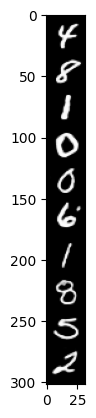

In [10]:
# now printing the predicted images
grid = torchvision.utils.make_grid(generated_im, nrow=1)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(img, cmap='gray')